In [1]:
import numpy
import scipy
import procps
import plotprelude
import matplotlib.pyplot as plt

with numpy.load("EQ14.npz") as fin:
    cl = fin['closures']
    eq14_1 = procps.mdays(cl[:,0:8],1)
    eq14_2 = procps.mdays(cl[:,8:],1)
    eq14 = numpy.concatenate((eq14_1, eq14_2),axis=1)

    

In [6]:
# Notch Filter

def NotchFilterScipy(time, band, freq, ripple, order, filter_type, data):       
    from scipy.signal import iirfilter                                                                      
    from scipy.signal import lfilter  
    fs = 1.0/time                    
    nyq = fs/2.0                                     
    low = freq - band/2.0
    high = freq + band/2.0                                                                                  
    low = low/nyq
    high = high/nyq                                  
    b, a = iirfilter(order, [low, high], rp = ripple, btype='bandstop',analog=False,ftype=filter_type)
    return lfilter(b,a,data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/spectral.py:1479: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


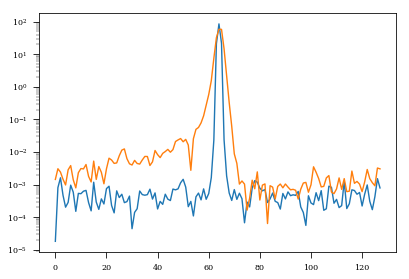

In [63]:
eq14_filtered_1 = NotchFilterScipy(5.12e-6,1000e-9,1e-6,0.01,5,'butter',eq14[180,0,10,515:775])
eq14_filtered_2 = NotchFilterScipy(5.12e-6,500e-9,1e-6,0.01,5,'butter',eq14[180,1,10,515:775])
eq14_filtered = numpy.stack((eq14_filtered_1,eq14_filtered_2)).T
# CSD of un-altered eq14_1, eq14_2
ps = procps.psXmedCTimCTri(numpy.exp(1j*eq14[180:181,:,10:11,515:775]))
ps_filtered = scipy.signal.csd(numpy.exp(1j*eq14_filtered[:,0]),
                        eq14_filtered[:,1],
                        nperseg=128,
                        detrend=None,
                        window='hann')




plt.semilogy(numpy.arange(128),ps)
plt.semilogy(numpy.arange(128),numpy.fft.fftshift(numpy.abs(ps_filtered[1])))
plt.show()